In [1]:
import numpy as np
from utils_clean import generate_sample, DEOptim, RandomOptim, PSOOptim, visualize_meshgrid, get_likelihood_grids, visualize_pred_meshgrid
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

In [2]:
def generate_dimensional_sample(n, n_dims, lower, upper, target_func, noise_scale=0, random_state=42):
    """
    Generates data sample.
    """
    rs = np.random.RandomState(random_state)
    X = rs.rand(n_dims,n)
    for i in range(n_dims):
        X[i] = X[i]*(upper[i]-lower[i]) + lower[i]
    y = target_func(X)
    y += rs.normal(0, noise_scale, size=y.shape)
    
    return (X,y)

In [3]:
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

n_dims = 3
lower_bound = -2.5, -1.5, -2.5
upper_bound = +1.5, +2.5, +2.5

X, y = generate_sample(70, n_dims, lower_bound, upper_bound, target_func)

In [4]:
y.shape

(70,)

In [5]:
X.shape

(3, 70)

In [7]:
seed = np.random.RandomState(42)
part = 10
dim = 3
pso = PSOOptim(n_iters=100, n_particles=part, c1=0.5, c2=0.3, w=0.9, init_pos=(seed.rand(part, dim)*22)-11, visualize=True)
gpr_pso = GaussianProcessRegressor(optimizer=pso.optimize, kernel=RBF(length_scale=(1,1,1)))
gpr_pso.fit(X.T, y[...,None])
y_pred = gpr_pso.predict(X.T)

2022-08-07 11:47:43,780 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


3


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=6.45e+4
2022-08-07 11:47:44,876 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 64463.48428290661, best pos: [-0.10505772  0.78675503 -1.36559731]


In [8]:
print(f'''Training Errors:
          Log Marginal Likelihood: {gpr_pso.log_marginal_likelihood_value_}
          Mean Squared Error: {mean_squared_error(y, y_pred)}
          R2 Score: {r2_score(y, y_pred)}
          MAPE: {mean_absolute_percentage_error(y, y_pred)}
''')

Training Errors:
          Log Marginal Likelihood: -64463.48428290661
          Mean Squared Error: 9.456982933036933e-17
          R2 Score: 1.0
          MAPE: 1.0308072312244384e-10



In [9]:
gpr_pso.kernel_.theta

array([-0.10505772,  0.78675503, -1.36559731])

In [46]:
dimensions = [3, 10, 15, 25, 35, 40, 45, 50, 75, 100, 125, 150, 200]
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)
results_thetas_per_dims = {}
results_logMargLikeli_per_dims = {}
results_mse_per_dims = {}
results_r2_per_dims = {}
results_mape_per_dims = {}

for d in dimensions:
    lower_bound = (-2.5,) * d
    upper_bound = (+1.5,) * d

    X, y = generate_sample(70, d, lower_bound, upper_bound, target_func)

    seed = np.random.RandomState(42)
    part = 10
    dim = d
    pso = PSOOptim(n_iters=100, n_particles=part, c1=0.5, c2=0.3, w=0.9, init_pos=(seed.rand(part, dim)*22)-11, visualize=True)
    gpr_pso = GaussianProcessRegressor(optimizer=pso.optimize, kernel=RBF(length_scale=(1,) * d))
    gpr_pso.fit(X.T, y[...,None])
    y_pred = gpr_pso.predict(X.T)

    results_thetas_per_dims[d] = gpr_pso.kernel_.theta
    results_logMargLikeli_per_dims[d] = gpr_pso.log_marginal_likelihood_value_
    results_mse_per_dims[d] = mean_squared_error(y, y_pred)
    results_r2_per_dims[d] = r2_score(y, y_pred)
    results_mape_per_dims[d] = mean_absolute_percentage_error(y, y_pred)

2022-08-07 12:23:23,101 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


3


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=6.22e+4
2022-08-07 12:23:24,122 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 62248.72374506975, best pos: [ 0.30644078 -0.00499394 -1.29315689]
2022-08-07 12:23:24,136 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


10


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=2.92e+5
2022-08-07 12:23:25,357 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 292225.7290537499, best pos: [0.98009056 1.87689929 0.49147885 3.35757584 1.65742611 1.42997789
 1.79910321 1.4839408  0.02412114 1.44515958]
2022-08-07 12:23:25,373 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


15


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=2.9e+6
2022-08-07 12:23:27,513 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2897189.03952818, best pos: [-0.75936743  6.94501219  4.4833783   2.56540724 -1.58194446  0.84783646
  3.8215658  -0.04002148 10.06088917  1.21259679  5.3525546   6.12706947
  3.36995092  5.88795412 -0.53483431]
2022-08-07 12:23:27,528 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


25


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=1e+7
2022-08-07 12:23:29,234 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 10024557.232218102, best pos: [ -2.76011739   9.91571474   5.10386672   2.17048665  -7.56758991
  -7.56812055  -9.72216053   8.05587521   2.22453026   4.57759671
 -10.54714113  10.33801675   7.3137381   -6.32853957  -6.99985072
  -6.96510078  -4.30667065   0.5446415   -1.49720959  -4.59295892
   2.46076368  -7.93113507  -4.57281773  -2.94003945  -0.96646035]
2022-08-07 12:23:29,248 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


35


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=1.96e+7
2022-08-07 12:23:32,153 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 19640482.252152745, best pos: [ -2.76011739   9.91571474   5.10386672   2.17048665  -7.56758991
  -7.56812055  -9.72216053   8.05587521   2.22453026   4.57759671
 -10.54714113  10.33801675   7.3137381   -6.32853957  -6.99985072
  -6.96510078  -4.30667065   0.5446415   -1.49720959  -4.59295892
   2.46076368  -7.93113507  -4.57281773  -2.94003945  -0.96646035
   6.27387115  -6.60717679   0.31315765   2.03312051  -9.97809092
   2.36598674  -7.24846928  -9.56886495   9.87548182  10.24390473]
2022-08-07 12:23:32,165 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


40


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=2.59e+7
2022-08-07 12:23:34,630 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 25927985.779195003, best pos: [ -2.76011739   9.91571474   5.10386672   2.17048665  -7.56758991
  -7.56812055  -9.72216053   8.05587521   2.22453026   4.57759671
 -10.54714113  10.33801675   7.3137381   -6.32853957  -6.99985072
  -6.96510078  -4.30667065   0.5446415   -1.49720959  -4.59295892
   2.46076368  -7.93113507  -4.57281773  -2.94003945  -0.96646035
   6.27387115  -6.60717679   0.31315765   2.03312051  -9.97809092
   2.36598674  -7.24846928  -9.56886495   9.87548182  10.24390473
   6.78474166  -4.29849708  -8.85121349   4.05312658  -1.31664514]
2022-08-07 12:23:34,641 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


45


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.3e+7
2022-08-07 12:23:37,433 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 33043486.167397212, best pos: [ -2.76011739   9.91571474   5.10386672   2.17048665  -7.56758991
  -7.56812055  -9.72216053   8.05587521   2.22453026   4.57759671
 -10.54714113  10.33801675   7.3137381   -6.32853957  -6.99985072
  -6.96510078  -4.30667065   0.5446415   -1.49720959  -4.59295892
   2.46076368  -7.93113507  -4.57281773  -2.94003945  -0.96646035
   6.27387115  -6.60717679   0.31315765   2.03312051  -9.97809092
   2.36598674  -7.24846928  -9.56886495   9.87548182  10.24390473
   6.78474166  -4.29849708  -8.85121349   4.05312658  -1.31664514
  -8.31515883  -0.10610798 -10.24345254   9.00504885  -5.3068404 ]
2022-08-07 12:23:37,444 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


50


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=4.07e+7
2022-08-07 12:23:40,403 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 40689319.47139302, best pos: [ -2.76011739   9.91571474   5.10386672   2.17048665  -7.56758991
  -7.56812055  -9.72216053   8.05587521   2.22453026   4.57759671
 -10.54714113  10.33801675   7.3137381   -6.32853957  -6.99985072
  -6.96510078  -4.30667065   0.5446415   -1.49720959  -4.59295892
   2.46076368  -7.93113507  -4.57281773  -2.94003945  -0.96646035
   6.27387115  -6.60717679   0.31315765   2.03312051  -9.97809092
   2.36598674  -7.24846928  -9.56886495   9.87548182  10.24390473
   6.78474166  -4.29849708  -8.85121349   4.05312658  -1.31664514
  -8.31515883  -0.10610798 -10.24345254   9.00504885  -5.3068404
   3.57549026  -4.14235633   0.44149647   1.02762615  -6.93320198]
2022-08-07 12:23:40,415 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


75


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=9.07e+7
2022-08-07 12:23:44,472 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 90705757.55934745, best pos: [ -2.76011739   9.91571474   5.10386672   2.17048665  -7.56758991
  -7.56812055  -9.72216053   8.05587521   2.22453026   4.57759671
 -10.54714113  10.33801675   7.3137381   -6.32853957  -6.99985072
  -6.96510078  -4.30667065   0.5446415   -1.49720959  -4.59295892
   2.46076368  -7.93113507  -4.57281773  -2.94003945  -0.96646035
   6.27387115  -6.60717679   0.31315765   2.03312051  -9.97809092
   2.36598674  -7.24846928  -9.56886495   9.87548182  10.24390473
   6.78474166  -4.29849708  -8.85121349   4.05312658  -1.31664514
  -8.31515883  -0.10610798 -10.24345254   9.00504885  -5.3068404
   3.57549026  -4.14235633   0.44149647   1.02762615  -6.93320198
  10.33086181   6.05292211   9.66897671   8.68620171   2.15379953
   9.28123317  -9.05316495  -6.68837703 -10.00499964  -3.84273272
  -2.44909

100


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=1.62e+8
2022-08-07 12:23:49,693 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 162008709.65273526, best pos: [ -2.76011739   9.91571474   5.10386672   2.17048665  -7.56758991
  -7.56812055  -9.72216053   8.05587521   2.22453026   4.57759671
 -10.54714113  10.33801675   7.3137381   -6.32853957  -6.99985072
  -6.96510078  -4.30667065   0.5446415   -1.49720959  -4.59295892
   2.46076368  -7.93113507  -4.57281773  -2.94003945  -0.96646035
   6.27387115  -6.60717679   0.31315765   2.03312051  -9.97809092
   2.36598674  -7.24846928  -9.56886495   9.87548182  10.24390473
   6.78474166  -4.29849708  -8.85121349   4.05312658  -1.31664514
  -8.31515883  -0.10610798 -10.24345254   9.00504885  -5.3068404
   3.57549026  -4.14235633   0.44149647   1.02762615  -6.93320198
  10.33086181   6.05292211   9.66897671   8.68620171   2.15379953
   9.28123317  -9.05316495  -6.68837703 -10.00499964  -3.84273272
  -2.4490

125


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=2.54e+8
2022-08-07 12:23:55,832 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 253684275.5699034, best pos: [ -2.76011739   9.91571474   5.10386672   2.17048665  -7.56758991
  -7.56812055  -9.72216053   8.05587521   2.22453026   4.57759671
 -10.54714113  10.33801675   7.3137381   -6.32853957  -6.99985072
  -6.96510078  -4.30667065   0.5446415   -1.49720959  -4.59295892
   2.46076368  -7.93113507  -4.57281773  -2.94003945  -0.96646035
   6.27387115  -6.60717679   0.31315765   2.03312051  -9.97809092
   2.36598674  -7.24846928  -9.56886495   9.87548182  10.24390473
   6.78474166  -4.29849708  -8.85121349   4.05312658  -1.31664514
  -8.31515883  -0.10610798 -10.24345254   9.00504885  -5.3068404
   3.57549026  -4.14235633   0.44149647   1.02762615  -6.93320198
  10.33086181   6.05292211   9.66897671   8.68620171   2.15379953
   9.28123317  -9.05316495  -6.68837703 -10.00499964  -3.84273272
  -2.44909

150


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.67e+8
2022-08-07 12:24:03,131 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367001267.31850064, best pos: [ -2.76011739   9.91571474   5.10386672   2.17048665  -7.56758991
  -7.56812055  -9.72216053   8.05587521   2.22453026   4.57759671
 -10.54714113  10.33801675   7.3137381   -6.32853957  -6.99985072
  -6.96510078  -4.30667065   0.5446415   -1.49720959  -4.59295892
   2.46076368  -7.93113507  -4.57281773  -2.94003945  -0.96646035
   6.27387115  -6.60717679   0.31315765   2.03312051  -9.97809092
   2.36598674  -7.24846928  -9.56886495   9.87548182  10.24390473
   6.78474166  -4.29849708  -8.85121349   4.05312658  -1.31664514
  -8.31515883  -0.10610798 -10.24345254   9.00504885  -5.3068404
   3.57549026  -4.14235633   0.44149647   1.02762615  -6.93320198
  10.33086181   6.05292211   9.66897671   8.68620171   2.15379953
   9.28123317  -9.05316495  -6.68837703 -10.00499964  -3.84273272
  -2.4490

200


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=6.51e+8
2022-08-07 12:24:12,857 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 651216496.6925896, best pos: [ -2.76011739   9.91571474   5.10386672   2.17048665  -7.56758991
  -7.56812055  -9.72216053   8.05587521   2.22453026   4.57759671
 -10.54714113  10.33801675   7.3137381   -6.32853957  -6.99985072
  -6.96510078  -4.30667065   0.5446415   -1.49720959  -4.59295892
   2.46076368  -7.93113507  -4.57281773  -2.94003945  -0.96646035
   6.27387115  -6.60717679   0.31315765   2.03312051  -9.97809092
   2.36598674  -7.24846928  -9.56886495   9.87548182  10.24390473
   6.78474166  -4.29849708  -8.85121349   4.05312658  -1.31664514
  -8.31515883  -0.10610798 -10.24345254   9.00504885  -5.3068404
   3.57549026  -4.14235633   0.44149647   1.02762615  -6.93320198
  10.33086181   6.05292211   9.66897671   8.68620171   2.15379953
   9.28123317  -9.05316495  -6.68837703 -10.00499964  -3.84273272
  -2.44909

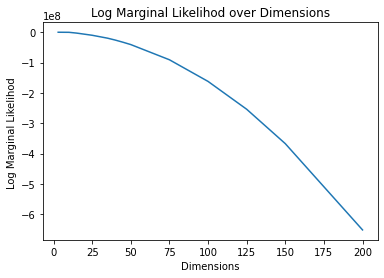

In [47]:
X_plot = results_logMargLikeli_per_dims.keys()
y_plot = results_logMargLikeli_per_dims.values()
plt.plot(X_plot, y_plot)
plt.title("Log Marginal Likelihod over Dimensions")
plt.xlabel("Dimensions")
plt.ylabel("Log Marginal Likelihod ")
plt.show()


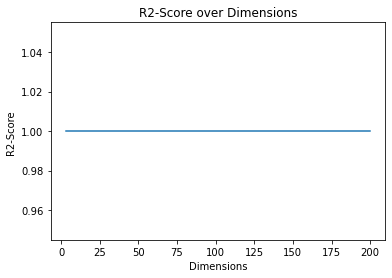

In [48]:
X_plot = results_r2_per_dims.keys()
y_plot = results_r2_per_dims.values()
plt.plot(X_plot, y_plot)
plt.title("R2-Score over Dimensions")
plt.xlabel("Dimensions")
plt.ylabel("R2-Score ")
plt.show()

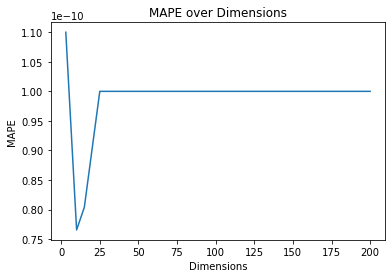

In [49]:
X_plot = results_mape_per_dims.keys()
y_plot = results_mape_per_dims.values()
plt.plot(X_plot, y_plot)
plt.title("MAPE over Dimensions")
plt.xlabel("Dimensions")
plt.ylabel("MAPE")
plt.show()

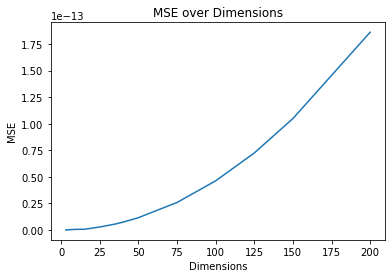

In [50]:
X_plot = results_mse_per_dims.keys()
y_plot = results_mse_per_dims.values()
plt.plot(X_plot, y_plot)
plt.title("MSE over Dimensions")
plt.xlabel("Dimensions")
plt.ylabel("MSE")
plt.show()